In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the CSV file
data = pd.read_csv('delhiaqi (1).csv')

# Display the first few rows to understand the structure
print(data.head())

                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


In [ ]:
# Check the data types and column names
print(data.info())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [ ]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date
data = data.sort_values(by='date')

# Set the 'date' column as the index if needed
data.set_index('date', inplace=True)

# Display the updated data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 2023-01-01 00:00:00 to 2023-01-24 08:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      561 non-null    float64
 1   no      561 non-null    float64
 2   no2     561 non-null    float64
 3   o3      561 non-null    float64
 4   so2     561 non-null    float64
 5   pm2_5   561 non-null    float64
 6   pm10    561 non-null    float64
 7   nh3     561 non-null    float64
dtypes: float64(8)
memory usage: 39.4 KB
None


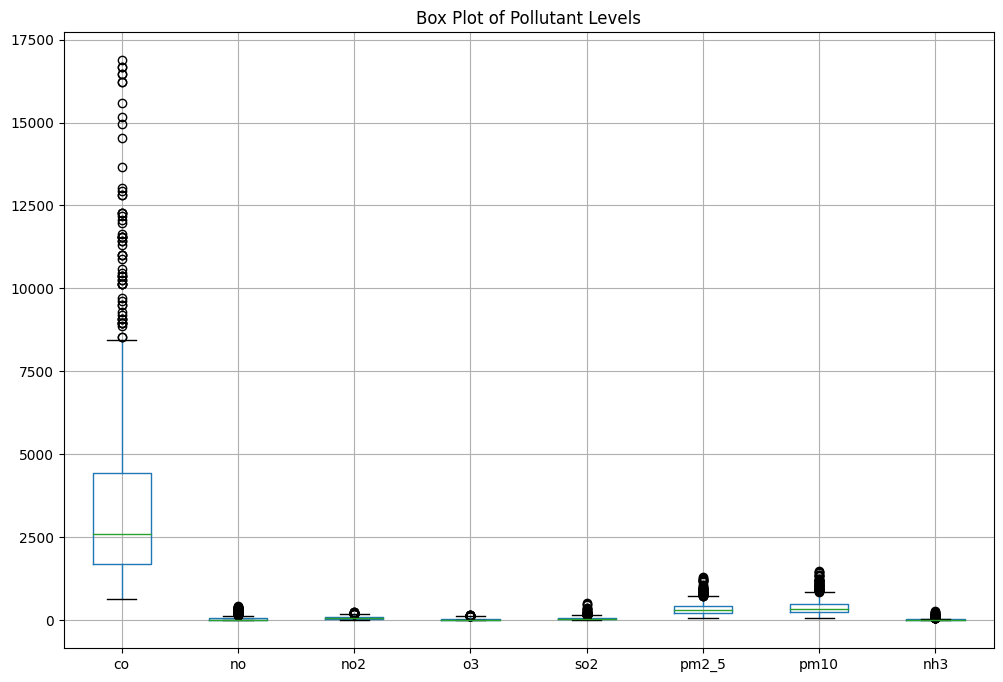

In [ ]:
# Box plot to visualize outliers for each pollutant
data.boxplot(figsize=(12,8))
plt.title('Box Plot of Pollutant Levels')
plt.show()

# Optionally, remove outliers based on Z-score or IQR
from scipy import stats

z_scores = stats.zscore(data)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_no_outliers = data[filtered_entries]



In [ ]:
# Display data without outliers
print(data_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526 entries, 2023-01-01 00:00:00 to 2023-01-24 08:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co      526 non-null    float64
 1   no      526 non-null    float64
 2   no2     526 non-null    float64
 3   o3      526 non-null    float64
 4   so2     526 non-null    float64
 5   pm2_5   526 non-null    float64
 6   pm10    526 non-null    float64
 7   nh3     526 non-null    float64
dtypes: float64(8)
memory usage: 37.0 KB
None


In [ ]:
# Create a 7-day moving average for PM2.5
data_no_outliers['pm2_5_7day_MA'] = data_no_outliers['pm2_5'].rolling(window=7).mean()

# Adding a season column
data_no_outliers['month'] = data_no_outliers.index.month
data_no_outliers['season'] = data_no_outliers['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Summer' if x in [3, 4, 5] else 'Monsoon' if x in [6, 7, 8] else 'Post-Monsoon')

# Display the data with new features
print(data_no_outliers.head())


                          co     no    no2    o3    so2   pm2_5    pm10  \
date                                                                      
2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

                       nh3  pm2_5_7day_MA  month  season  
date                                                      
2023-01-01 00:00:00   5.83            NaN      1  Winter  
2023-01-01 01:00:00   7.66            NaN      1  Winter  
2023-01-01 02:00:00  11.40            NaN      1  Winter  
2023-01-01 03:00:00  13.55            NaN      1  Winter  
2023-01-01 04:00:00  14.19            NaN      1  Winter  
/tmp/ipykernel_76/3453611468.py:2: SettingWithCopyWarning: 
A

In [ ]:
# Select columns to standardize
pollutant_columns = ['pm2_5', 'pm10', 'nh3', 'no', 'no2', 'so2', 'co', 'o3']

# Standardize the pollutant data
scaler = StandardScaler()
data_no_outliers[pollutant_columns] = scaler.fit_transform(data_no_outliers[pollutant_columns])

# Display the standardized data
print(data_no_outliers.head())


                           co        no       no2        o3       so2  \
date                                                                    
2023-01-01 00:00:00 -0.703134 -0.621070 -0.861703 -0.641760 -0.997043   
2023-01-01 01:00:00 -0.610240 -0.528540 -0.785024 -0.740998 -0.881581   
2023-01-01 02:00:00 -0.331556 -0.153757 -0.737343 -0.790998 -0.669764   
2023-01-01 03:00:00 -0.052871  0.343145 -0.718383 -0.769932 -0.515814   
2023-01-01 04:00:00  0.086469  0.583617 -0.699143 -0.653181 -0.425920   

                        pm2_5      pm10       nh3  pm2_5_7day_MA  month  \
date                                                                      
2023-01-01 00:00:00 -0.892311 -0.886426 -0.712845            NaN      1   
2023-01-01 01:00:00 -0.813981 -0.807780 -0.621206            NaN      1   
2023-01-01 02:00:00 -0.597721 -0.570501 -0.433921            NaN      1   
2023-01-01 03:00:00 -0.408977 -0.362691 -0.326257            NaN      1   
2023-01-01 04:00:00 -0.331167 -0.27332

In [ ]:
data = data_no_outliers

print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526 entries, 2023-01-01 00:00:00 to 2023-01-24 08:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co             526 non-null    float64
 1   no             526 non-null    float64
 2   no2            526 non-null    float64
 3   o3             526 non-null    float64
 4   so2            526 non-null    float64
 5   pm2_5          526 non-null    float64
 6   pm10           526 non-null    float64
 7   nh3            526 non-null    float64
 8   pm2_5_7day_MA  520 non-null    float64
 9   month          526 non-null    int32  
 10  season         526 non-null    object 
dtypes: float64(9), int32(1), object(1)
memory usage: 47.3+ KB
None


In [ ]:
data.to_csv('delhiaqi (1).csv', index=False)

In [ ]:
# Summary statistics for the pollutants
summary_stats = data.describe()

print(summary_stats)


                 co            no           no2            o3           so2  \
count  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02   
mean  -1.350842e-16  8.105050e-17 -4.052525e-17 -9.455892e-17  1.215758e-16   
std    1.000952e+00  1.000952e+00  1.000952e+00  1.000952e+00  1.000952e+00   
min   -1.138578e+00 -6.508379e-01 -1.587786e+00 -7.915053e-01 -1.336972e+00   
25%   -6.915231e-01 -6.076661e-01 -7.373434e-01 -7.865561e-01 -7.596583e-01   
50%   -3.547770e-01 -4.473968e-01 -2.212226e-01 -4.442995e-01 -2.910783e-01   
75%    2.896788e-01  1.507326e-01  5.240994e-01  4.565195e-01  3.891161e-01   
max    4.150612e+00  4.671985e+00  3.467466e+00  2.984358e+00  4.271184e+00   

              pm2_5          pm10           nh3  pm2_5_7day_MA  month  
count  5.260000e+02  5.260000e+02  5.260000e+02     520.000000  526.0  
mean  -3.242020e-16  2.431515e-16 -2.161347e-16     325.093819    1.0  
std    1.000952e+00  1.000952e+00  1.000952e+00     149.539180    0.0  


                     co        no       no2        o3       so2     pm2_5  \
co             1.000000  0.949944  0.740147 -0.492387  0.514970  0.925137   
no             0.949944  1.000000  0.627310 -0.386401  0.535799  0.827347   
no2            0.740147  0.627310  1.000000 -0.387322  0.684498  0.618729   
o3            -0.492387 -0.386401 -0.387322  1.000000  0.120568 -0.455006   
so2            0.514970  0.535799  0.684498  0.120568  1.000000  0.435534   
pm2_5          0.925137  0.827347  0.618729 -0.455006  0.435534  1.000000   
pm10           0.949946  0.856759  0.646436 -0.475307  0.447233  0.991789   
nh3            0.770771  0.761404  0.719898 -0.323361  0.632742  0.596309   
pm2_5_7day_MA  0.572560  0.467524  0.289265 -0.265417  0.239314  0.760273   

                   pm10       nh3  pm2_5_7day_MA  
co             0.949946  0.770771       0.572560  
no             0.856759  0.761404       0.467524  
no2            0.646436  0.719898       0.289265  
o3            -0.475307 -

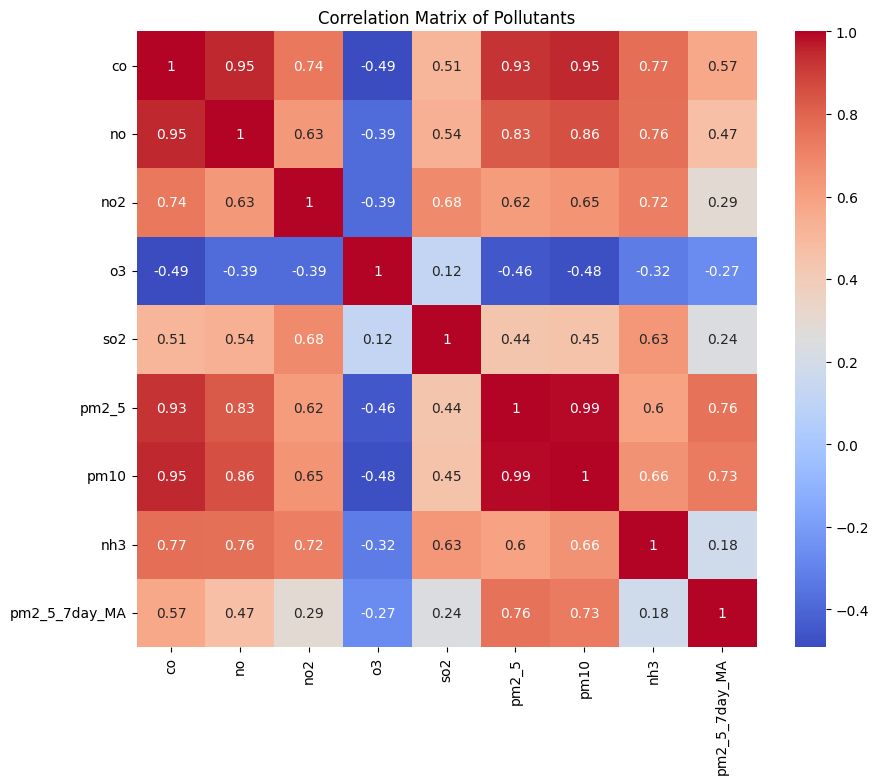

In [ ]:
# Select only the numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numerical_data.corr()

print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')
plt.show()


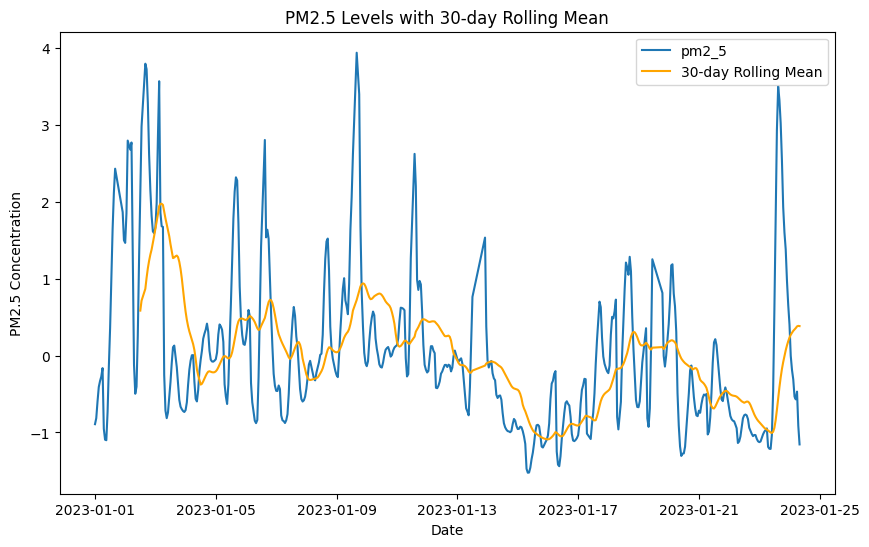

In [ ]:
# Plot rolling mean of PM2.5
data['pm2_5_RollingMean'] = data['pm2_5'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pm2_5'], label='pm2_5')
plt.plot(data.index, data['pm2_5_RollingMean'], label='30-day Rolling Mean', color='orange')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Levels with 30-day Rolling Mean')
plt.legend()
plt.show()


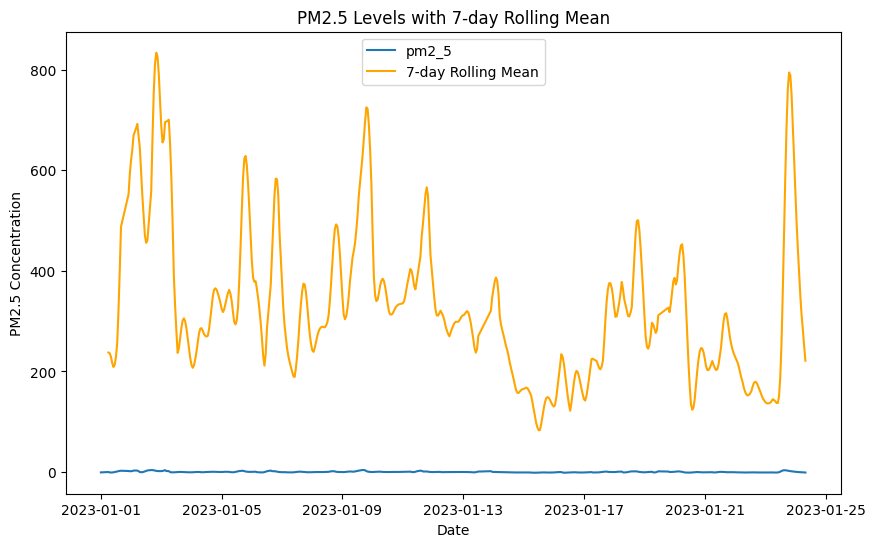

In [ ]:
# Plot rolling mean of PM2.5
# data['pm2_5_RollingMean'] = data['pm2_5'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['pm2_5'], label='pm2_5')
plt.plot(data.index, data['pm2_5_7day_MA'], label='7-day Rolling Mean', color='orange')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Levels with 7-day Rolling Mean')
plt.legend()
plt.show()

In [ ]:
pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 134.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 58.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


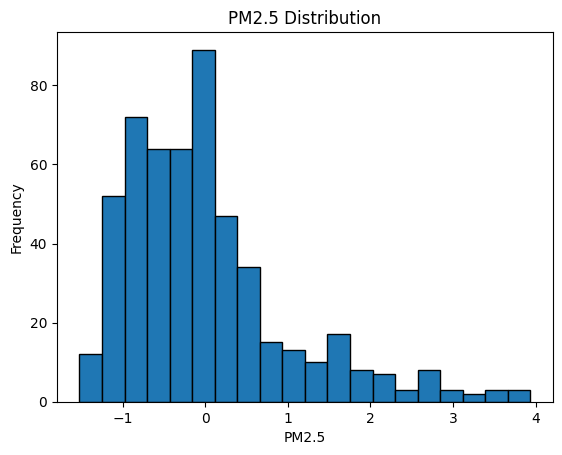

In [ ]:
# Plot histogram
plt.hist(data['pm2_5'].dropna(), bins=20, edgecolor='black')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.title('PM2.5 Distribution')
plt.show()


In [ ]:
import pandas as pd

# Compute summary statistics for each pollutant
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']  # Replace with your actual pollutant columns
summary_stats = data[pollutants].describe()
print("Descriptive Statistics for Pollutants:")
print(summary_stats)


Descriptive Statistics for Pollutants:
                 co            no           no2            o3           so2  \
count  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02  5.260000e+02   
mean  -1.350842e-16  8.105050e-17 -4.052525e-17 -9.455892e-17  1.215758e-16   
std    1.000952e+00  1.000952e+00  1.000952e+00  1.000952e+00  1.000952e+00   
min   -1.138578e+00 -6.508379e-01 -1.587786e+00 -7.915053e-01 -1.336972e+00   
25%   -6.915231e-01 -6.076661e-01 -7.373434e-01 -7.865561e-01 -7.596583e-01   
50%   -3.547770e-01 -4.473968e-01 -2.212226e-01 -4.442995e-01 -2.910783e-01   
75%    2.896788e-01  1.507326e-01  5.240994e-01  4.565195e-01  3.891161e-01   
max    4.150612e+00  4.671985e+00  3.467466e+00  2.984358e+00  4.271184e+00   

              pm2_5          pm10           nh3  
count  5.260000e+02  5.260000e+02  5.260000e+02  
mean  -3.242020e-16  2.431515e-16 -2.161347e-16  
std    1.000952e+00  1.000952e+00  1.000952e+00  
min   -1.523520e+00 -1.487086e+00 -9.732407e-01  

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

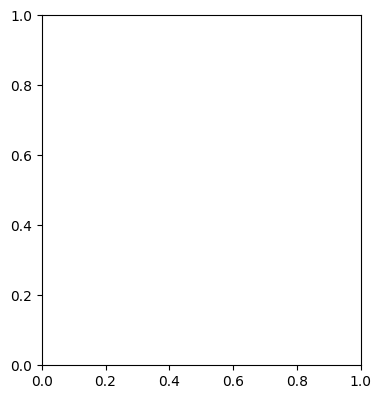

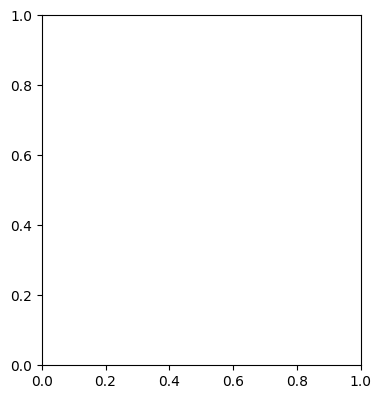

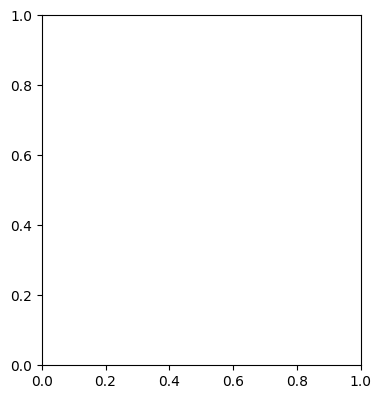

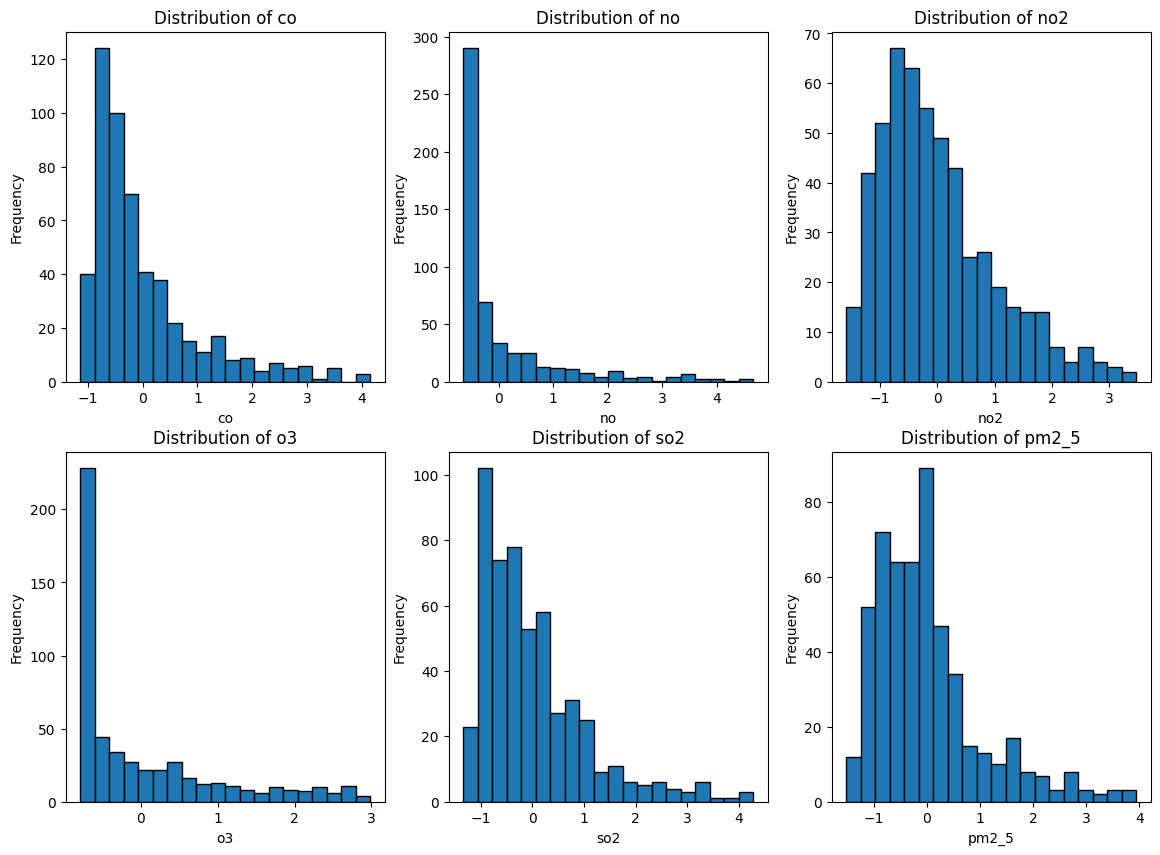

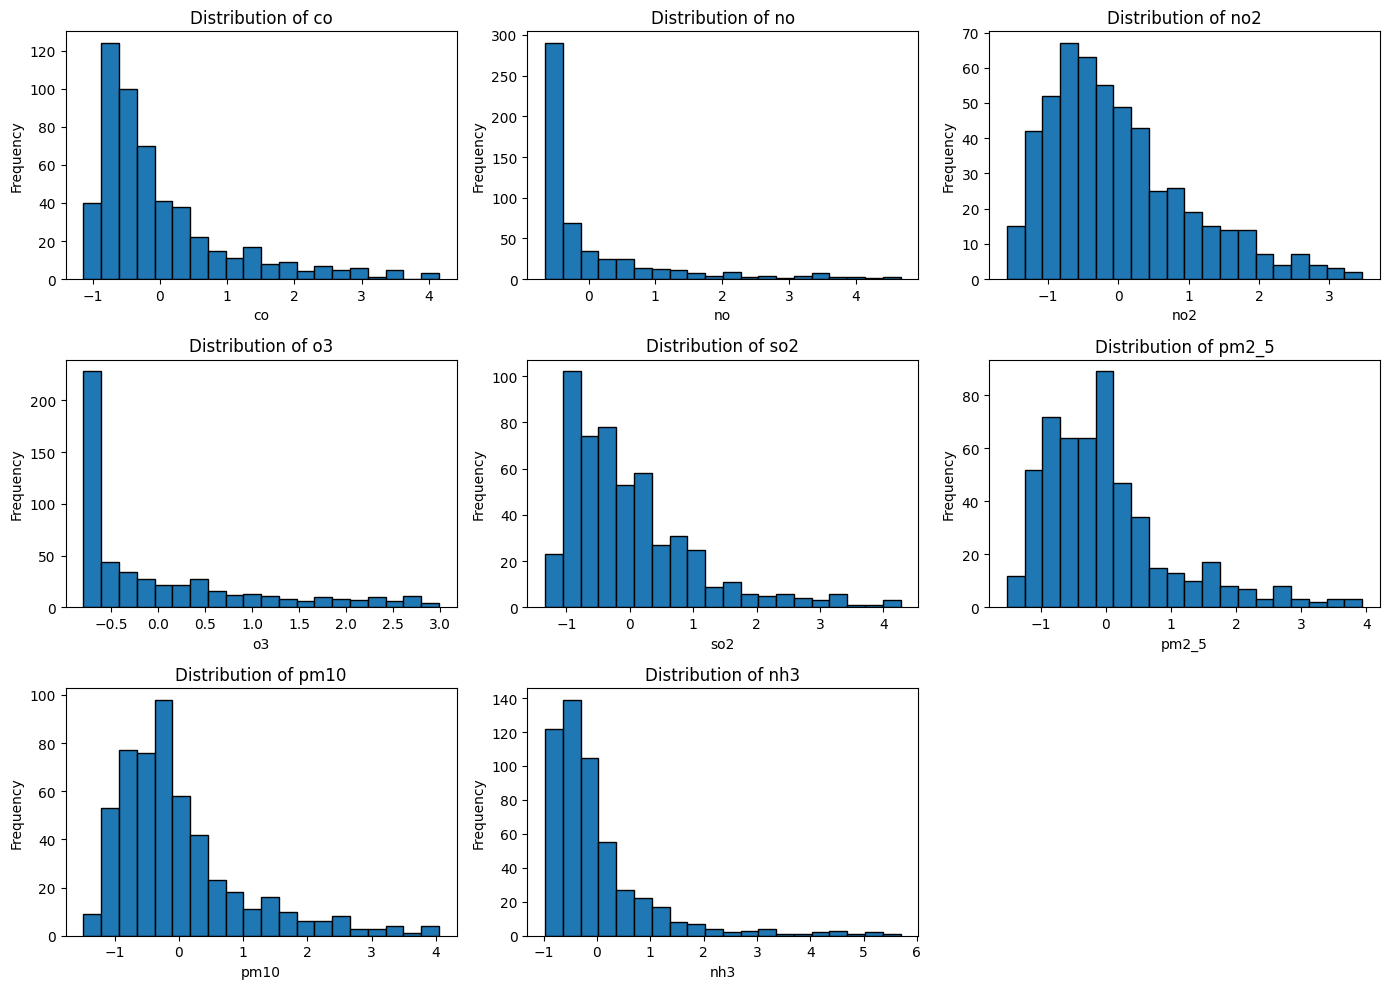

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each pollutant
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[pollutant].dropna(), bins=20, edgecolor='black')
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


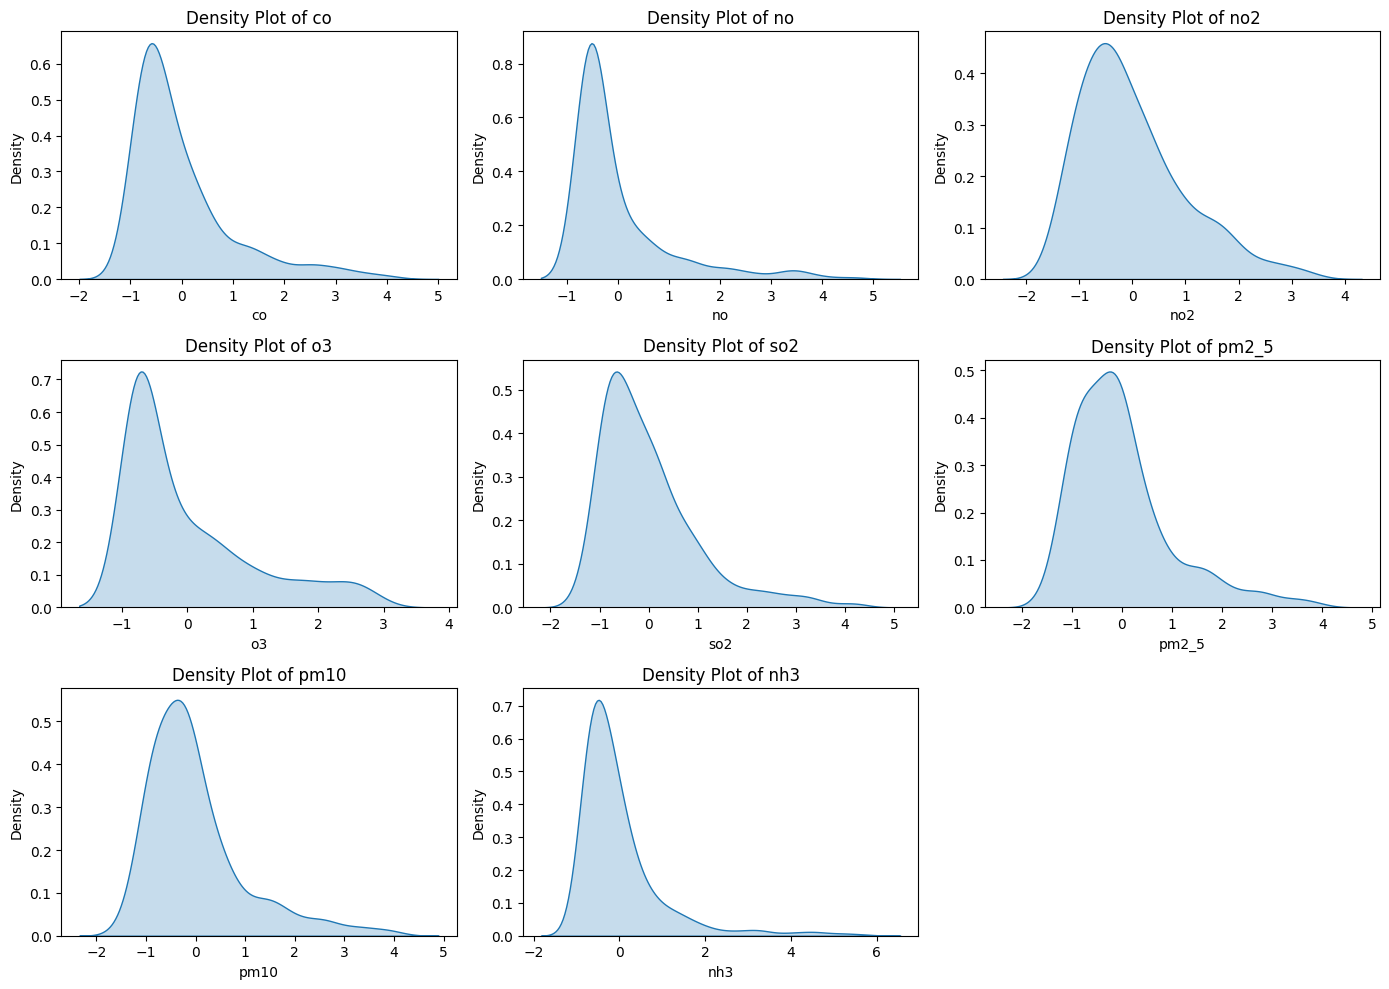

In [ ]:
# Plot density plots for each pollutant
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(data[pollutant].dropna(), fill=True)
    plt.title(f'Density Plot of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

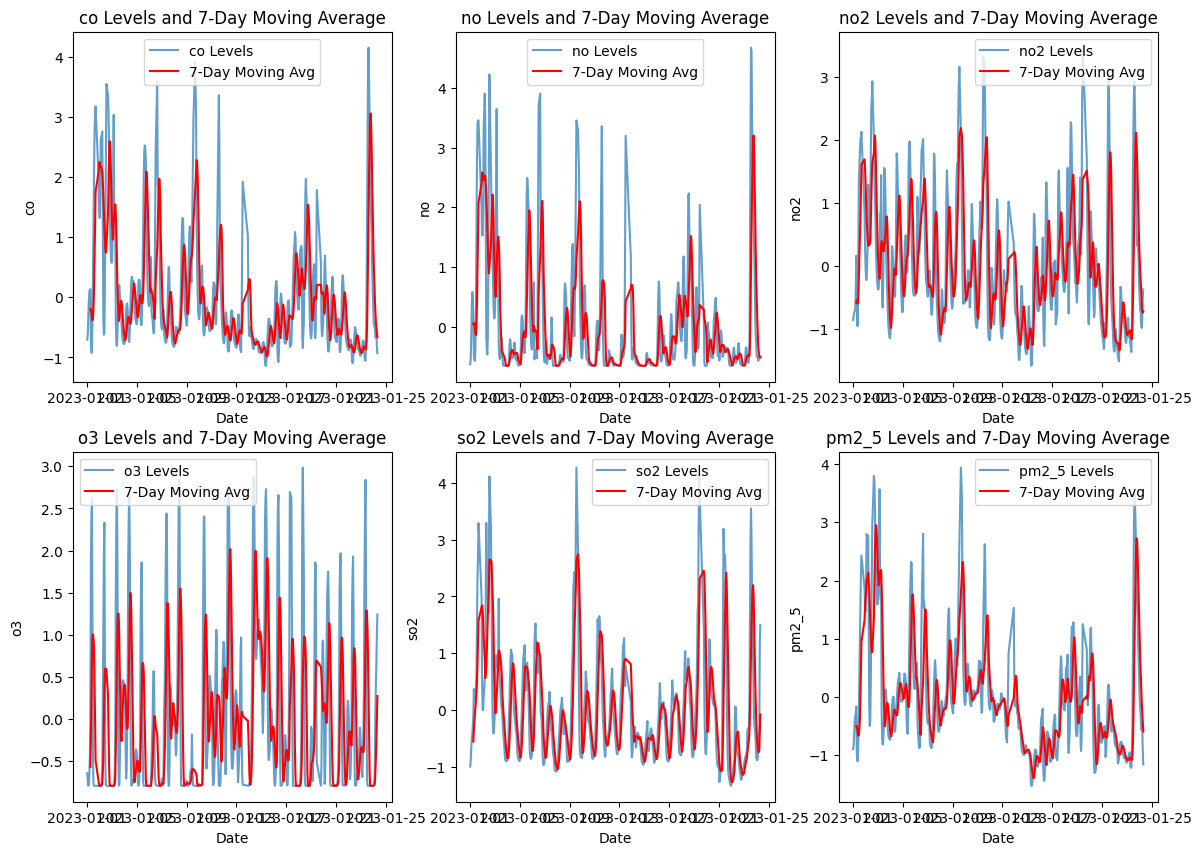

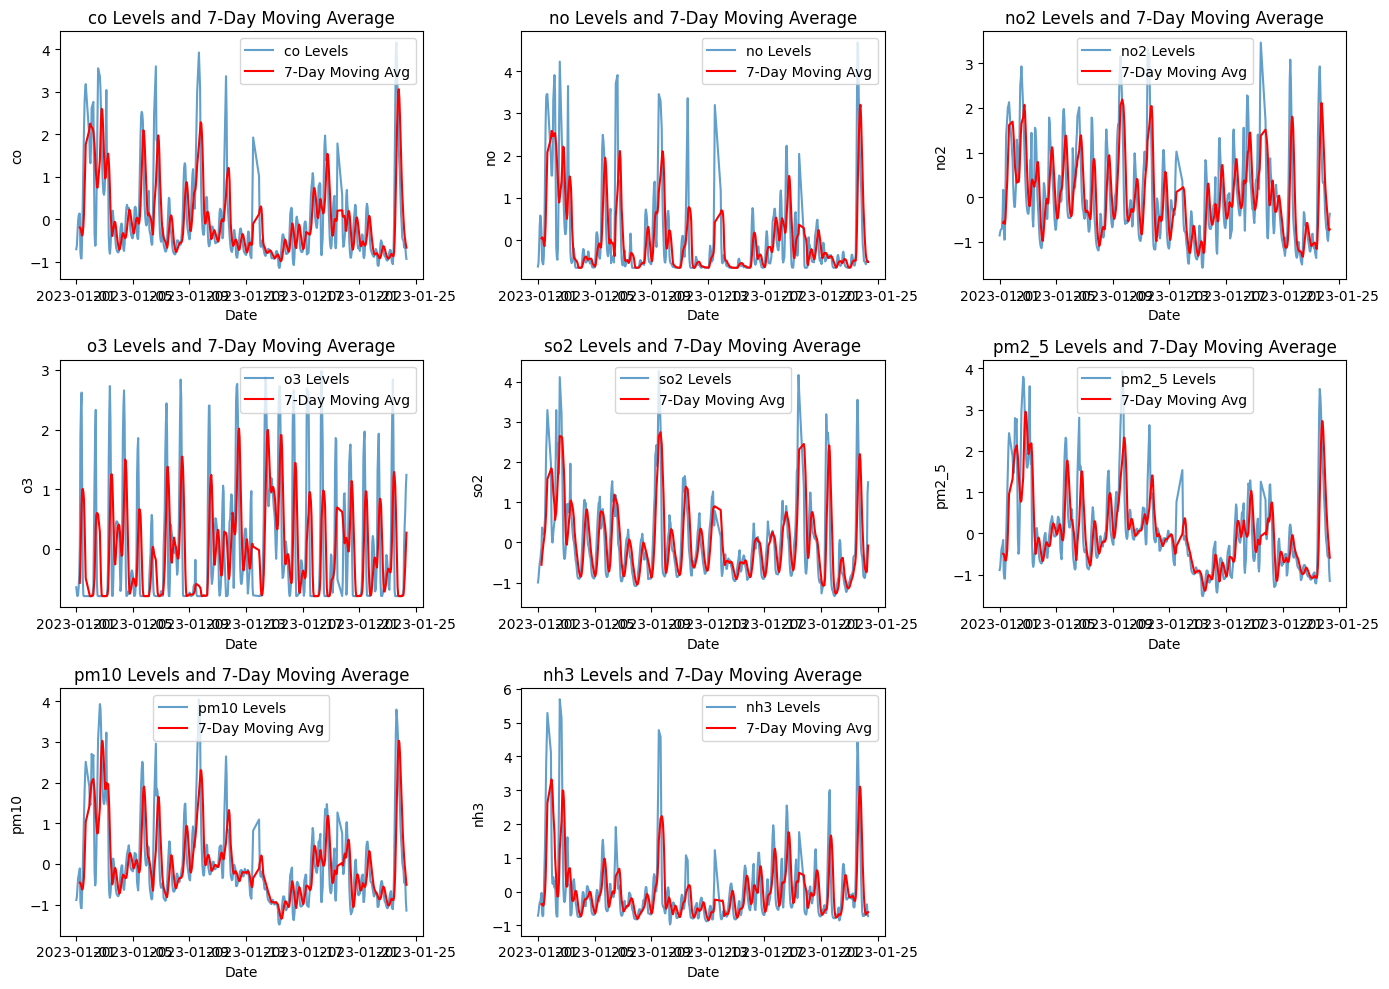

In [ ]:
# Plot time series and moving averages for each pollutant
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants, 1):
    data[f'{pollutant}_MA'] = data[pollutant].rolling(window=7).mean()  # 7-day moving average
    plt.subplot(3, 3, i)
    plt.plot(data.index, data[pollutant], label=f'{pollutant} Levels', alpha=0.7)
    plt.plot(data.index, data[f'{pollutant}_MA'], label=f'7-Day Moving Avg', color='red')
    plt.xlabel('Date')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} Levels and 7-Day Moving Average')
    plt.legend()
plt.tight_layout()
plt.show()

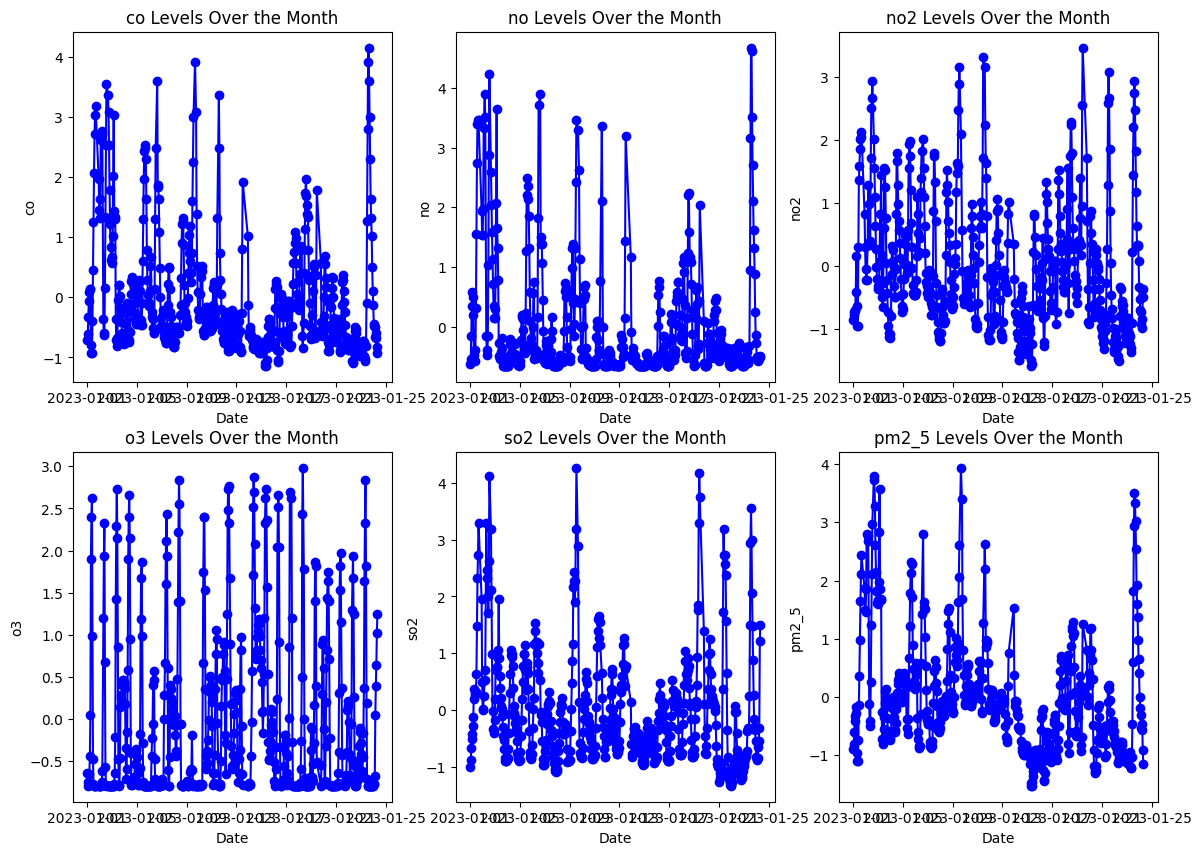

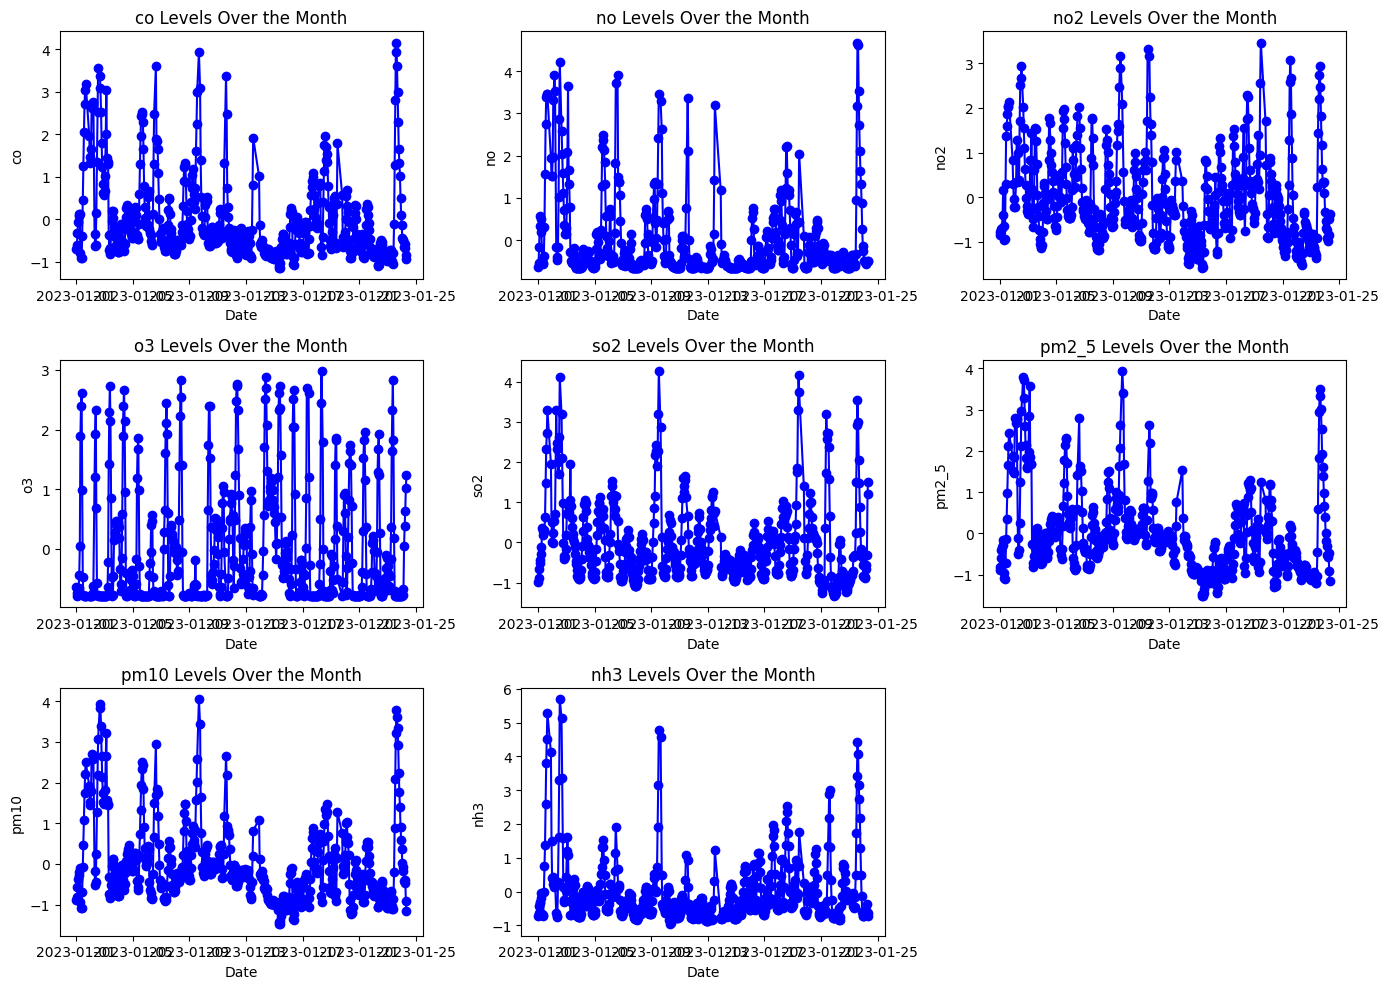

In [ ]:
plt.figure(figsize=(14, 10))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 3, i)
    plt.plot(data.index, data[pollutant], marker='o', linestyle='-', color='blue')
    plt.xlabel('Date')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} Levels Over the Month')
plt.tight_layout()
plt.show()


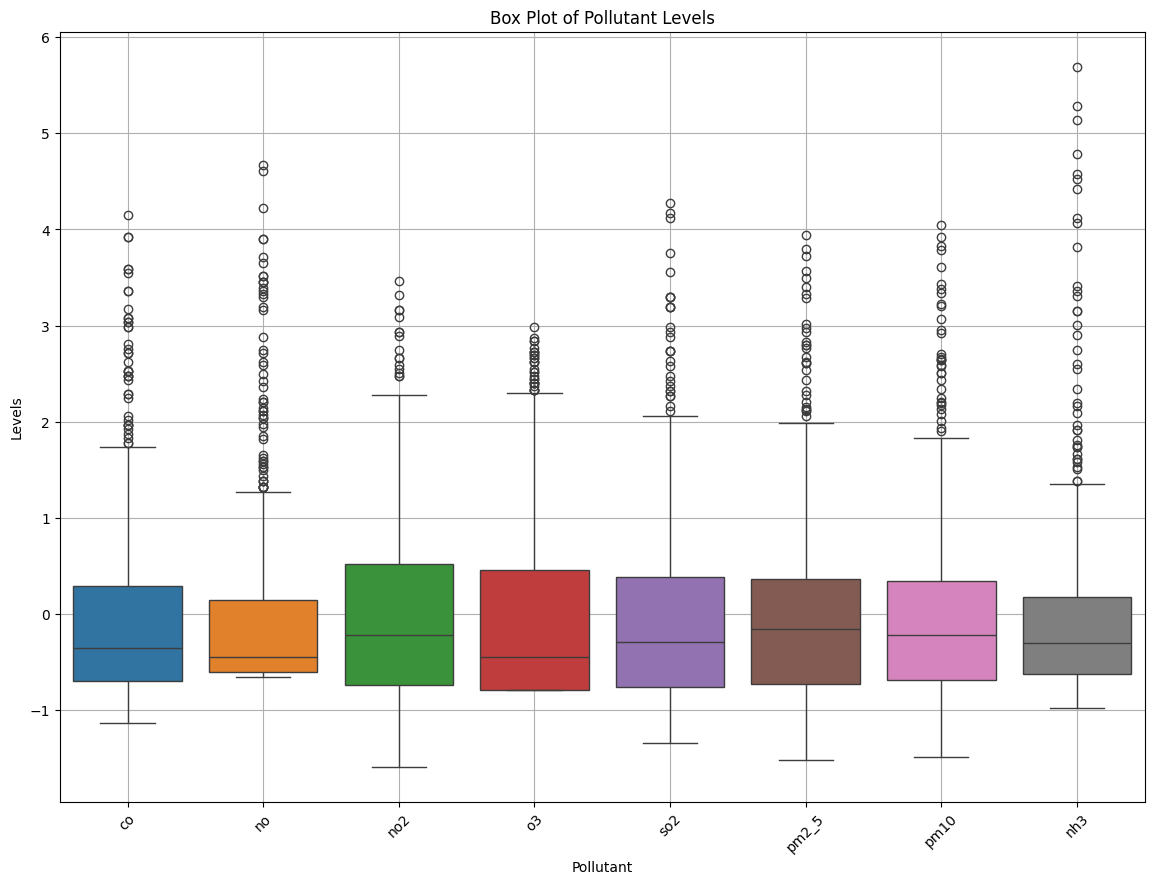

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=data[pollutants])
plt.xlabel('Pollutant')
plt.ylabel('Levels')
plt.title('Box Plot of Pollutant Levels')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526 entries, 2023-01-01 00:00:00 to 2023-01-24 08:00:00
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   co                 526 non-null    float64
 1   no                 526 non-null    float64
 2   no2                526 non-null    float64
 3   o3                 526 non-null    float64
 4   so2                526 non-null    float64
 5   pm2_5              526 non-null    float64
 6   pm10               526 non-null    float64
 7   nh3                526 non-null    float64
 8   pm2_5_7day_MA      520 non-null    float64
 9   month              526 non-null    int32  
 10  season             526 non-null    object 
 11  pm2_5_RollingMean  497 non-null    float64
 12  co_MA              520 non-null    float64
 13  no_MA              520 non-null    float64
 14  no2_MA             520 non-null    float64
 15  o3_MA              520 non-null    fl

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20db64c5-5e79-482f-a191-958161980bbf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>